In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler

In [2]:
# load the data set
df = pd.read_csv('GlobalWeatherRepository.csv')
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [5]:
# 计算每个城市的'feels_like_celsius'列在22到26摄氏度之间的数量
comfortable_df = df[(df['feels_like_celsius'] >= 22) & (df['feels_like_celsius'] <= 26)]

# 按城市分组并统计记录数量
comfortable_days_per_city = comfortable_df.groupby('location_name').size().reset_index(name='comfortable_days')

# 显示结果
print(comfortable_days_per_city.sort_values(by='comfortable_days', ascending=False))

# save the sorted result to a CSV file
comfortable_days_per_city.sort_values(by='comfortable_days', ascending=False).to_csv('comfortable_days_per_city.csv', index=False)

    location_name  comfortable_days
114       Nairobi               241
157         Sanaa               217
67         Harare               182
183      Windhoek               170
14         Asmara               163
..            ...               ...
123    Nuku'alofa                 1
73        Jakarta                 1
162     Singapore                 1
53     Costa Rica                 1
128       Palikir                 1

[187 rows x 2 columns]


In [14]:
# select the loaction_name column, wind_kph column, humidity column, precip_mm column, temperature_celsius column and comfortable_days column
comfortable_days_per_city = comfortable_days_per_city[['location_name', 'comfortable_days']]
# merge the comfortable_days_per_city DataFrame with the original DataFrame to get the other columns
merged_df = pd.merge(df, comfortable_days_per_city, on='location_name', how='inner')

# select the columns we want to keep
selected_columns = ['location_name', 'wind_kph', 'humidity', 'precip_mm', 'temperature_celsius', 'comfortable_days']
merged_df = merged_df[selected_columns]

# save the merged DataFrame to a CSV file
merged_df.to_csv('comfortable_days_per_city_with_details.csv', index=False)

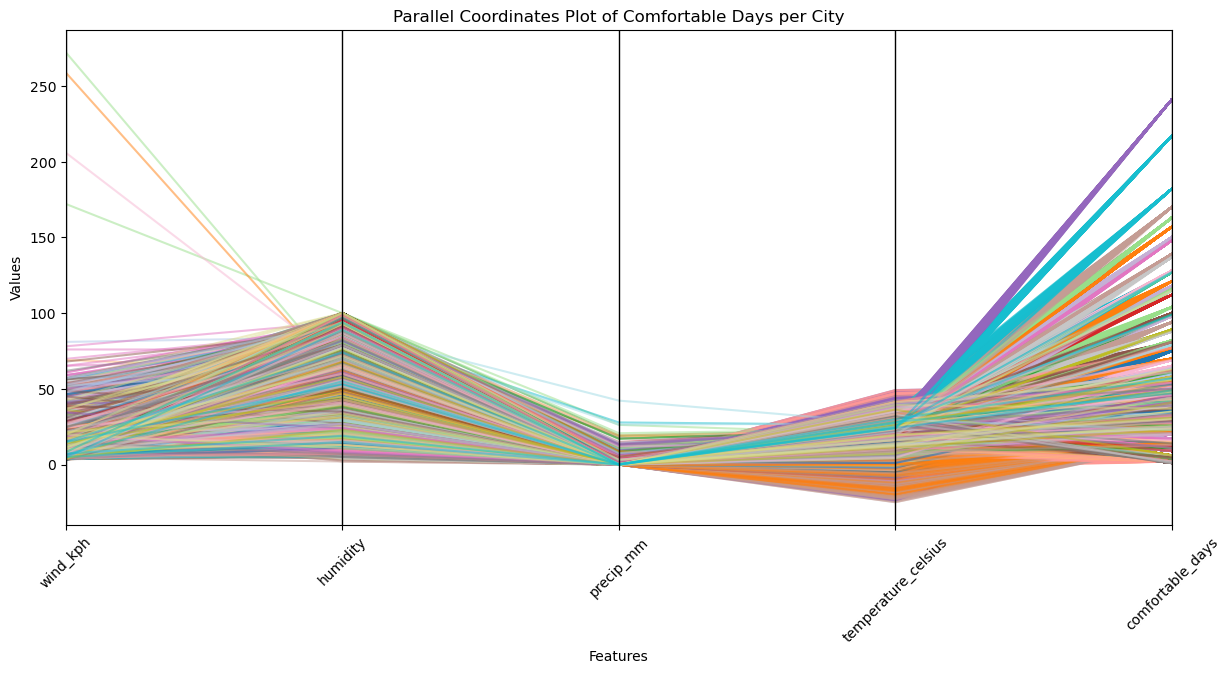

In [17]:
# load the merged DataFrame
merged_df = pd.read_csv('comfortable_days_per_city_with_details.csv')

# delete the 'wing_kph' value >500
merged_df = merged_df[merged_df['wind_kph'] <= 500]

# plot the parallel coordinates, use 248 colors for the lines
plt.figure(figsize=(12, 6))
plt.title('Parallel Coordinates Plot of Comfortable Days per City')
plt.xlabel('Features')
plt.ylabel('Values')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
parallel_coordinates(merged_df, 'location_name', colormap=plt.get_cmap('tab20', 248), alpha=0.5)
plt.legend([], [], frameon=False)
plt.show()